In [1]:
from examples_cfosat import *

In [2]:
print_info_storage()

 ___ CNES L2 (nadir data + boxes) __________________________________________________________ 
Path :
/home/datawork-cersat-public/provider/cnes/satellite/l2/cfosat/swim/swi_l2____/op05/5.1.2/YYYY/DDD/
____________________________________________________________________________________________

 ___ ODL L2S (ribbon product) ______________________________________________________________ 
Path :
/home/ref-cfosat-public/datasets/swi_l2s/v0.4/YYYY/DDD/
____________________________________________________________________________________________

 ___ CMEMS L3 (nadir data - calibrated against J3 +buoys) __________________________________
Path :
/home/ref-cmems-public/tac/wave/WAVE_GLO_WAV_L3_SWH_NRT_OBSERVATIONS_014_001/dataset-wav-alti-l3-swh-rt-global-cfoYYYY/MM/


In [3]:
# read data
ds_l2s=read_l2s_offnadir_files(offnadirExampleFiles)
ds_nadir = read_nadir_from_L2_CNES(L2_CNES_ExampleFiles,flag_1Hz=0)
ds_nadir_1Hz = read_nadir_from_L2_CNES(L2_CNES_ExampleFiles,flag_1Hz=1)
ds_nadir_L3=read_nadir_from_L3_CMEMS(L3_CMEMS_ExampleFiles)
ds_boxes = read_boxes_from_L2_CNES(L2_CNES_ExampleFiles)
# plt.tight_layout()

In [4]:
# print(ds_boxes.isel(time0=100))
print_summary_xarray(ds_boxes.isel(time0=100))

Dimensions:                (iswest: 2, nparam: 3, n_beam_l2: 3, npartitions: 3, nk: 32, n_phi: 12, n_corners: 5)
Coordinates:
    *empty*
Data variables:
    lat              (iswest) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    lon              (iswest) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    wave_param       (nparam, iswest, n_beam_l2) float32 dask.array<chunksize=(3, 2, 3), meta=np.ndarray>
    wave_param_part  (nparam, npartitions, iswest, n_beam_l2) float32 dask.array<chunksize=(3, 3, 2, 3), meta=np.ndarray>
    pp_mean          (nk, n_phi, iswest, n_beam_l2) float32 dask.array<chunksize=(32, 12, 2, 3), meta=np.ndarray>
    k_spectra        (nk) float32 dask.array<chunksize=(32,), meta=np.ndarray>
    phi_vector       (n_phi) float32 dask.array<chunksize=(12,), meta=np.ndarray>
    swh_ecmwf        (iswest) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    time_box         (iswest) datetime64[us] dask.array<chunksize=(2,), meta=np.ndarray>
    freq

0.2122025053714493


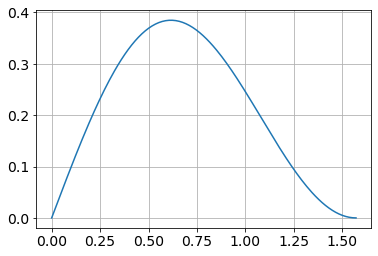

In [51]:
theta=np.linspace(0,np.pi/2,180)
y=np.cos(theta)**2*np.sin(theta)
plt.plot(theta,y)
plt.grid(True)

dtheta=theta[1]-theta[0]
print(np.sum(y*dtheta)/(np.pi/2))

In [55]:
fs=0.2
ccs=0.2
rhoa=1.29
alphaa=330
rhow=1026
2.5*np.pi*4*np.pi**2*fs**2*ccs*rhoa**2/(alphaa**2*rhow**2)

3.6007786456721056e-11

0.0
359.49999999999994


<xarray.Dataset>
Dimensions:              (src_grid_rank: 2, dst_grid_rank: 2, src_grid_size: 232560, dst_grid_size: 12960, dst_grid_corners: 4, num_links: 415922, num_wgts: 1)
Dimensions without coordinates: src_grid_rank, dst_grid_rank, src_grid_size, dst_grid_size, dst_grid_corners, num_links, num_wgts
Data variables: (12/17)
    src_grid_dims        (src_grid_rank) int32 720 323
    dst_grid_dims        (dst_grid_rank) int32 ...
    src_grid_center_lat  (src_grid_size) float64 -1.361 -1.361 ... 1.449 1.449
    dst_grid_center_lat  (dst_grid_size) float64 ...
    src_grid_center_lon  (src_grid_size) float64 3.142 3.15 ... 3.124 3.133
    dst_grid_center_lon  (dst_grid_size) float64 ...
    ...                   ...
    dst_grid_area        (dst_grid_size) float64 ...
    src_grid_frac        (src_grid_size) float64 ...
    dst_grid_frac        (dst_grid_size) float64 ...
    src_address          (num_links) int32 ...
    dst_address          (num_links) int32 ...
    remap_matrix         (num_links, num_wgts) float64 ...
Attributes:
    title:          SCRIP remapping with CDO
    normalization:  fracarea
    map_method:     Conservative remapping using clipping on sphere
    conventions:    SCRIP
    source_grid:    lonlat
    dest_grid:      projection
    history:        11 Jan 2022 : cdo gencon,remap_I37NO_ex.txt LOPS_WW3-GLOB...
    CDO:            Climate Data Operators version 1.9.9rc1 (https://mpimet.m...

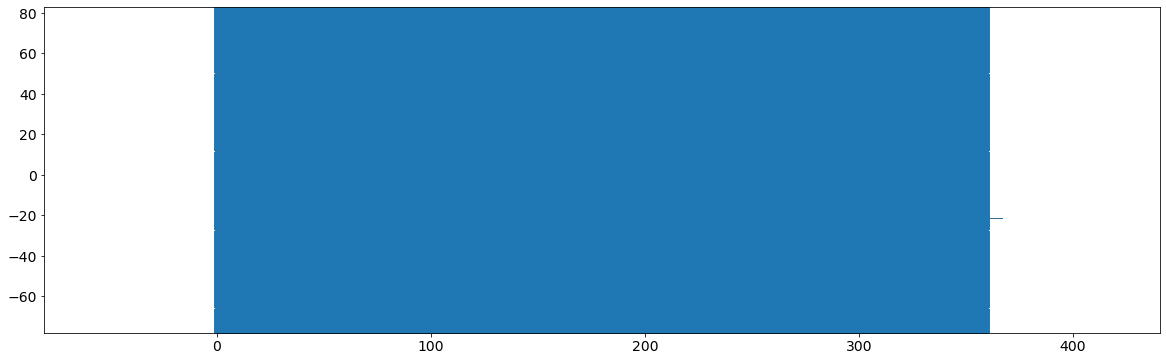

In [99]:
ds_grid_transfo = xr.open_dataset('/home/mdecarlo/PROJETS/ARROW/CDO_ex/GridTransformation_I37NO_ex.nc')
ds_grid_transfo

EarthSurface_m2 = 510065700*10**6
area_model = ds_grid_transfo.src_grid_area.data*EarthSurface_m2/(4*np.pi)
area_lon = ds_grid_transfo.src_grid_center_lon.data*180/np.pi
area_lat = ds_grid_transfo.src_grid_center_lat.data*180/np.pi

area_lon2D = area_lon.reshape(ds_grid_transfo.src_grid_dims.data.T)
area_lat2D = area_lat.reshape(ds_grid_transfo.src_grid_dims.data.T)
print(min(area_lon))
print(max(area_lon))
plt.figure(figsize=(20,6))
plt.plot(area_lon,area_lat,'*')
plt.pcolormesh(area_lon2D,area_lat2D,area_lat2D)
# print(np.median(area_model))
# print(area_lon)
# print(area_lat)
ds_grid_transfo

Frozen({'x': 720, 'y': 317, 'f': 22})
Frozen({'longitude': 720, 'latitude': 323, 'fs': 22, 'f': 22})
Frozen({'longitude': 720, 'latitude': 323, 'frequency': 22})


(array([ 74111.,    942.,    748.,    725.,    637.,    592.,    501.,
           405.,    367.,    279.,    317.,    314.,    290.,    286.,
           286.,    270.,    248.,    268.,    227.,    261.,    221.,
           215.,    220.,    268.,    227.,    257.,    203.,    228.,
           238.,    240.,    232.,    249.,    237.,    277.,    306.,
           335.,    273.,    337.,    343.,    376.,    442.,    484.,
           537.,    575.,    654.,    795.,    985.,   1370.,   1904.,
        137458.]),
 array([0.00000000e+00, 2.23379791e-13, 4.46759583e-13, 6.70139374e-13,
        8.93519165e-13, 1.11689896e-12, 1.34027875e-12, 1.56365854e-12,
        1.78703833e-12, 2.01041812e-12, 2.23379791e-12, 2.45717770e-12,
        2.68055750e-12, 2.90393729e-12, 3.12731708e-12, 3.35069687e-12,
        3.57407666e-12, 3.79745645e-12, 4.02083624e-12, 4.24421604e-12,
        4.46759583e-12, 4.69097562e-12, 4.91435541e-12, 5.13773520e-12,
        5.36111499e-12, 5.58449478e-12, 5.80787457e-

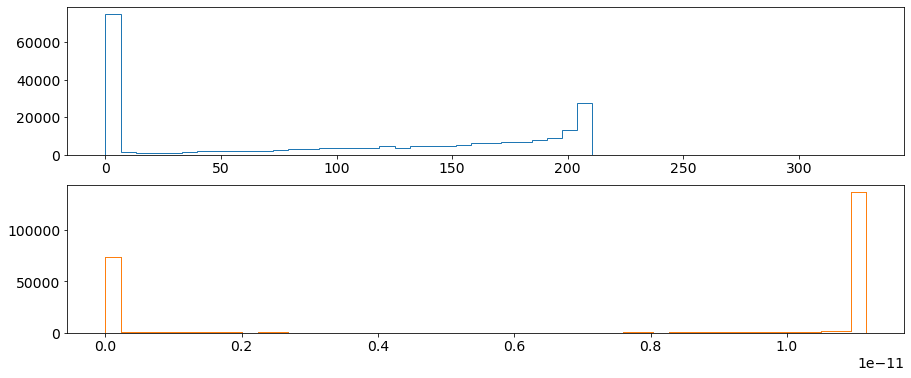

In [47]:
ds_power_da_these = xr.open_dataset('/home1/datahome/mdecarlo/BIOOMARC/Power_coeff_dA_20-90.nc')
ds_power_ARROW = xr.open_dataset('/home1/datahome/mdecarlo/BIOOMARC/AcousticFactor.nc')
ds_power_ARROW_transfo = xr.open_dataset('/home1/datahome/mdecarlo/BIOOMARC/AcousticTransformationFactor.nc')

print(ds_power_da_these.dims)
print(ds_power_ARROW.dims)
print(ds_power_ARROW_transfo.dims)
      
fig,axs=plt.subplots(2,1,figsize=(15,6))#,subplot_kw={'projection':ccrs.PlateCarree()},sharex=True,sharey=True)
axs[0].hist(ds_power_da_these.pmap.sum(dim='f').compute().data.flatten(),bins=50,histtype='step')
axs[1].hist(ds_power_ARROW.FacAc.sum(dim='fs').compute().data.flatten(),bins=50,histtype='step')
axs[1].hist(ds_power_ARROW_transfo.FacAc.sum(dim='frequency').compute().data.flatten(),bins=50,histtype='step')

dfs = ds_power_ARROW.fs.data*(0.5*(1.1-1/1.1))



# ax0, g1 =init_map_cartopy(axs[0])
# ax0.pcolormesh(ds_power_da_these.x,ds_power_da_these.y,ds_power_da_these.pmap.sum(dim='f'))
# ax0, g1 =init_map_cartopy(axs[1])
# ax0.pcolormesh(ds_power_ARROW.longitude,ds_power_ARROW.latitude,ds_power_ARROW.FacAc.sum(dim='fs'))
# ax0, g1 =init_map_cartopy(axs[2])
# ax0.pcolormesh(ds_power_ARROW_transfo.longitude,ds_power_ARROW_transfo.latitude,ds_power_ARROW_transfo.FacAc.sum(dim='frequency'))
# # print(ds_power_da_these.pmap.sum(dim='f'))
# # print(ds_power_ARROW.FacAc.sum(dim="fs"))
# print(ds_power_ARROW_transfo.FacAc.sum(dim="frequency"))



FUNCTION get_nearest_model_interpolator(args*)
     this function obtains interpolators for the lon and lat of the model
     i.e. doing lat_interpolator(lat_CFOSAT) returns the model latitudes 
     closest to the track latitudes.
     Optionnal inputs are:
	- lon_lims : the model limits of lon (default = [-180, 180])
	- lat_lims : the model limits of lat (default = [-78, 83])
	- lon_step : the model step in lon (default = 0.5)
	- lat_step : the model step in lat (default = 0.5)
.....
associated function : 
FUNCTION get_nearest_model_interpolator_index(args*)
     takes the same inputs as 'get_nearest_model_interpolator'
     this function obtains interpolators for the INDICES of lon and lat of the model
     i.e. doing lat_interpolator(lat_CFOSAT) returns the model latitude INDICES


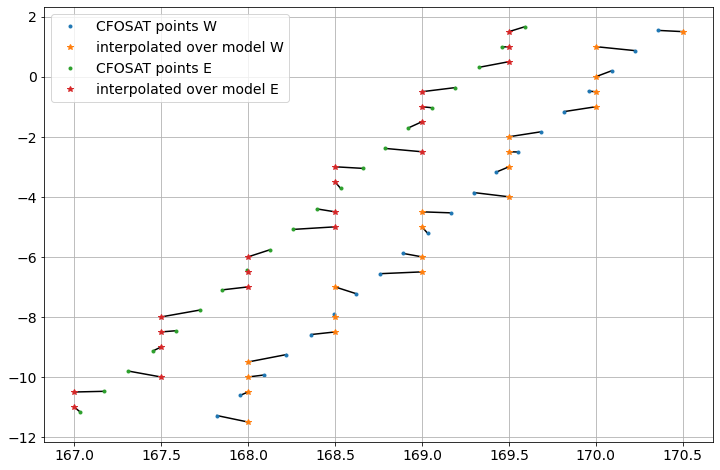

In [4]:
plot_usage_get_nearest_model_interpolator(ds_boxes.isel(time0=slice(100,120)))

In [22]:
# timvec = pd.Timestamp(T1.year+(mth-1)//12,((mth-1)%12)+1,1)
def find_time_index():
    
    return index_time
T1 = pd.Timestamp(2019,12,1)
T2 = pd.Timestamp(2020,1,1)
timevec = pd.date_range(start=T1,end=T2, freq='3H')
timevec2 = (timevec - T1)/pd.to_timedelta(1,unit='s')
# print(timevec)
print(timevec2)

time_ds = pd.to_datetime(ds_boxes.isel(iswest=0,time0=slice(100,120)).time_box)

time_tointerp= (time_ds - T1)/pd.to_timedelta(1,unit='s')
print(time_tointerp)
time_interpolator=spi.interp1d(timevec,np.arange(len(timevec2)),kind='nearest')


# time_interp = time_interpolator(np.floor(time_tointerp))
time_interp = time_interpolator(np.floor(time_ds))

# lon_mod = np.arange(lon_lims[0],lon_lims[1],lon_step)
#     lat_mod = np.arange(lat_lims[0],lat_lims[1],lat_step)
#     lon_interpolator=spi.interp1d(lon_mod,lon_mod,kind='nearest')
#     lat_interpolator=spi.interp1d(lat_mod,lat_mod,kind='nearest')
    
#     return lon_interpolator, lat_interpolator

print(time_interp)

Float64Index([      0.0,   10800.0,   21600.0,   32400.0,   43200.0,   54000.0,
                64800.0,   75600.0,   86400.0,   97200.0,
              ...
              2581200.0, 2592000.0, 2602800.0, 2613600.0, 2624400.0, 2635200.0,
              2646000.0, 2656800.0, 2667600.0, 2678400.0],
             dtype='float64', length=249)
Float64Index([1713063.018095, 1713073.746394, 1713084.431034, 1713095.143992,
              1713105.982607, 1713116.721122, 1713127.449945, 1713138.136502,
              1713148.572863, 1713159.314441, 1713170.064166, 1713180.886174,
              1713191.589612, 1713202.416944, 1713212.878401,  1713223.63841,
              1713234.395734, 1713245.261068, 1713256.029263, 1713266.491896],
             dtype='float64')


UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [20]:
print(max(time_tointerp))
print(max(timevec2))

print(min(time_tointerp))
print(min(timevec2))


1713266.491896
2678400.0
1713063.018095
0.0


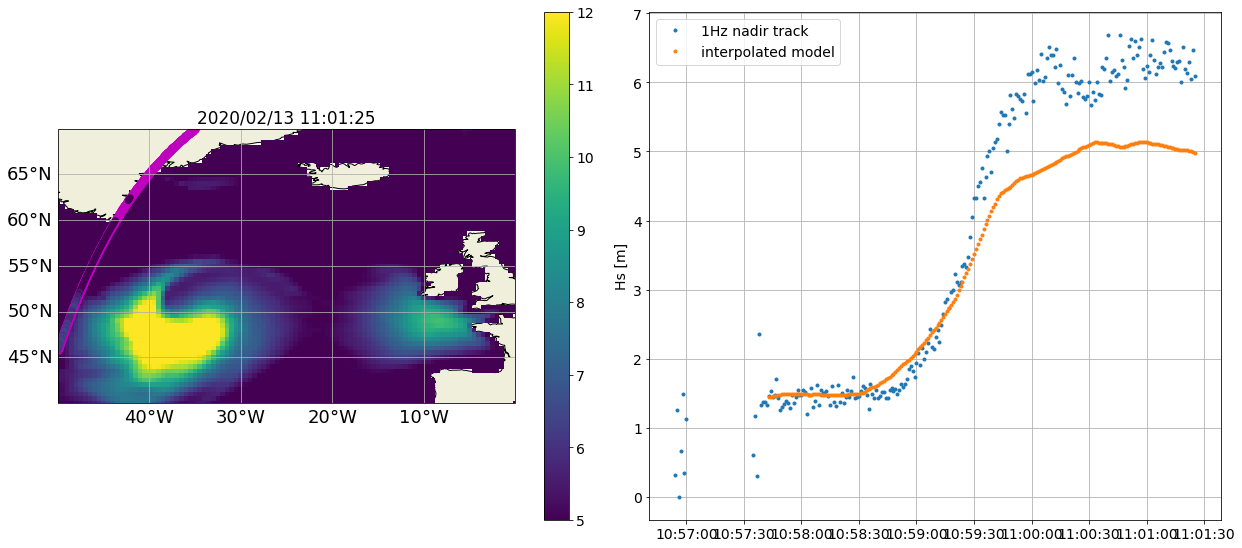

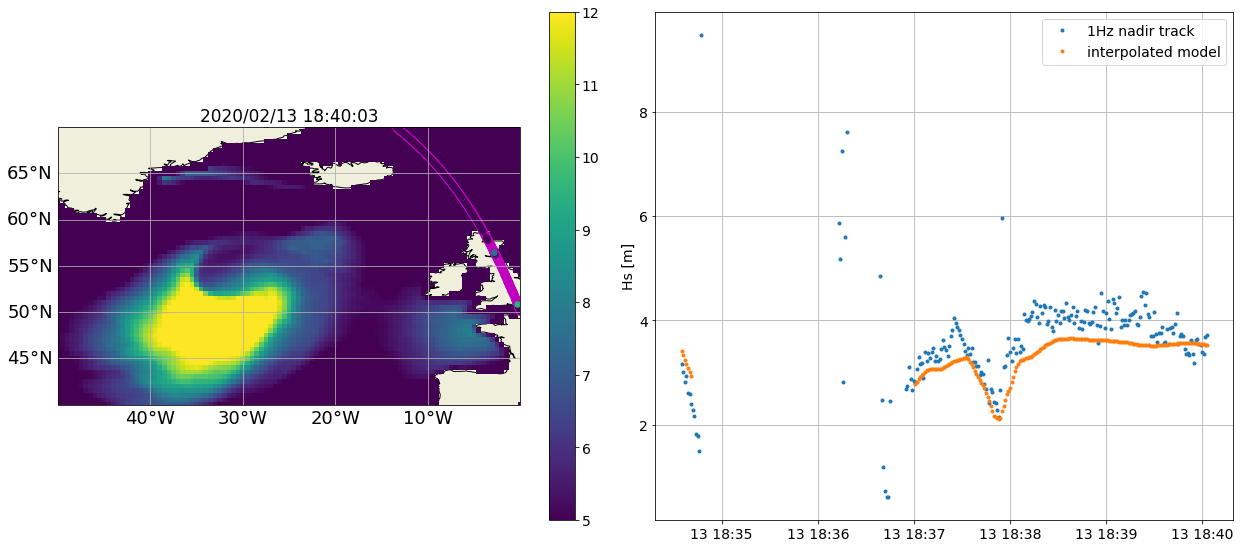

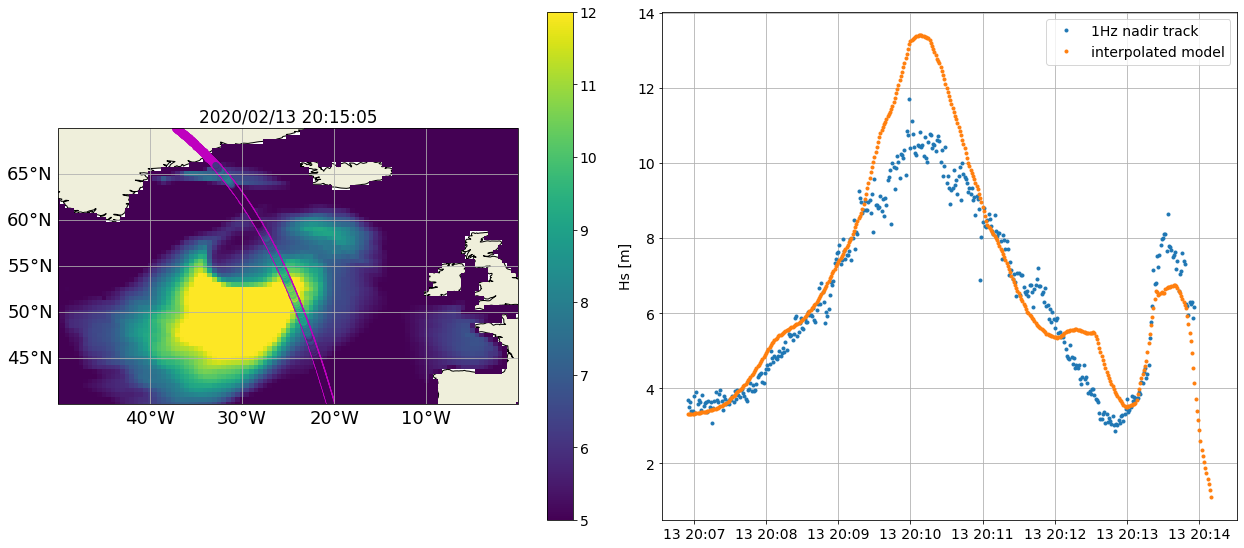

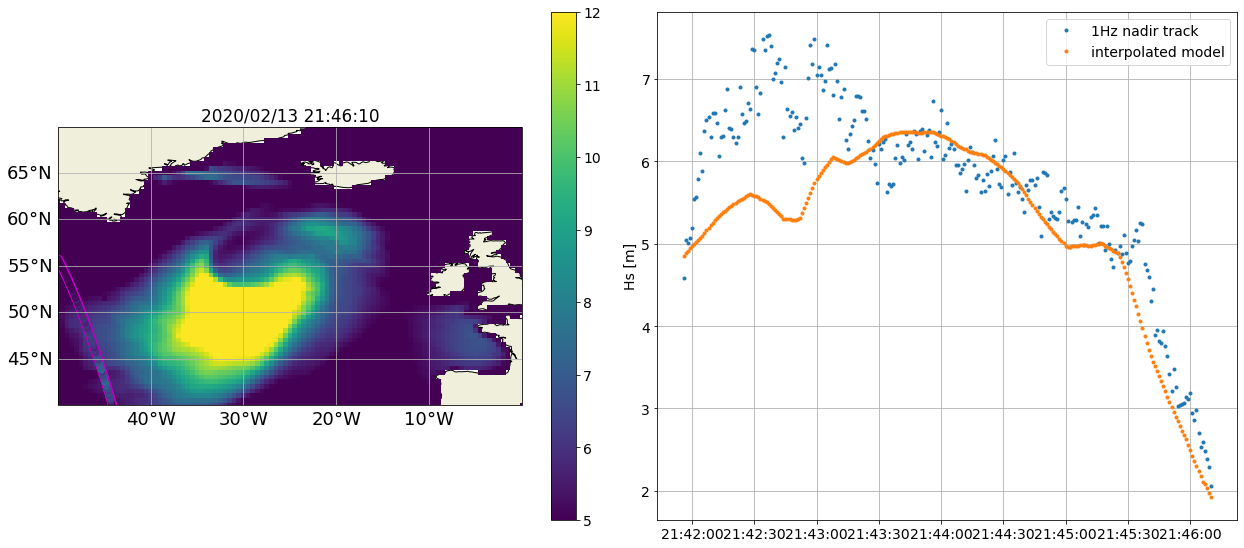

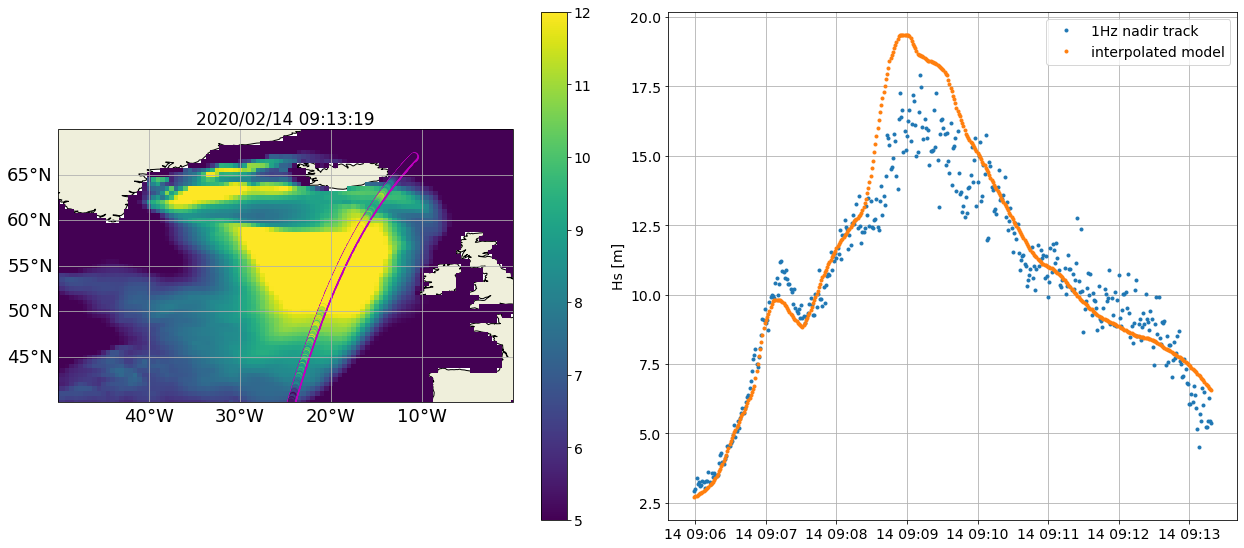

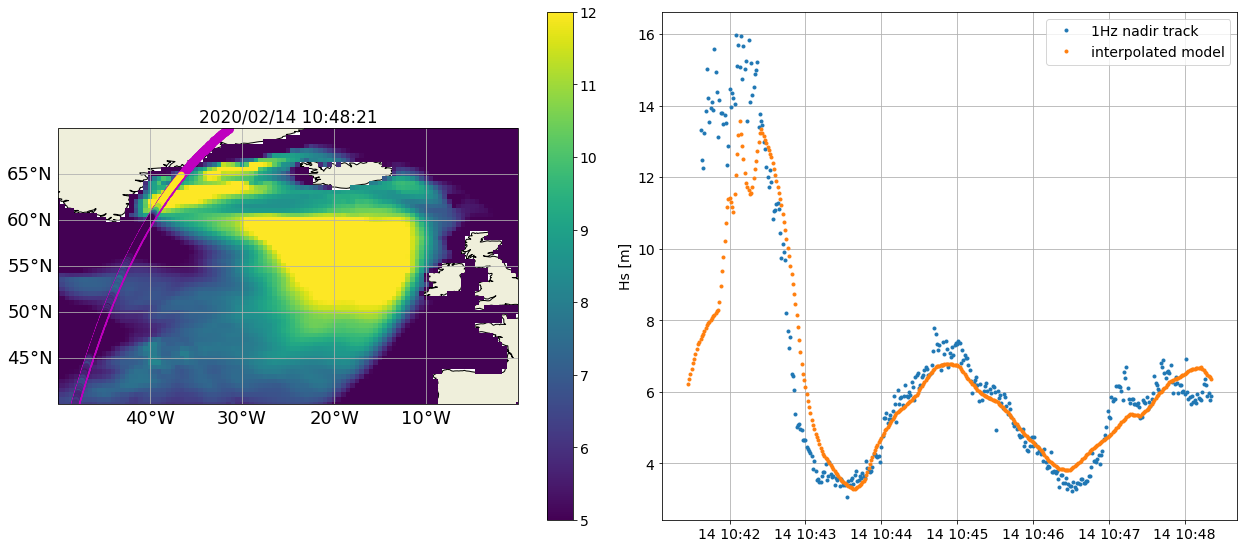

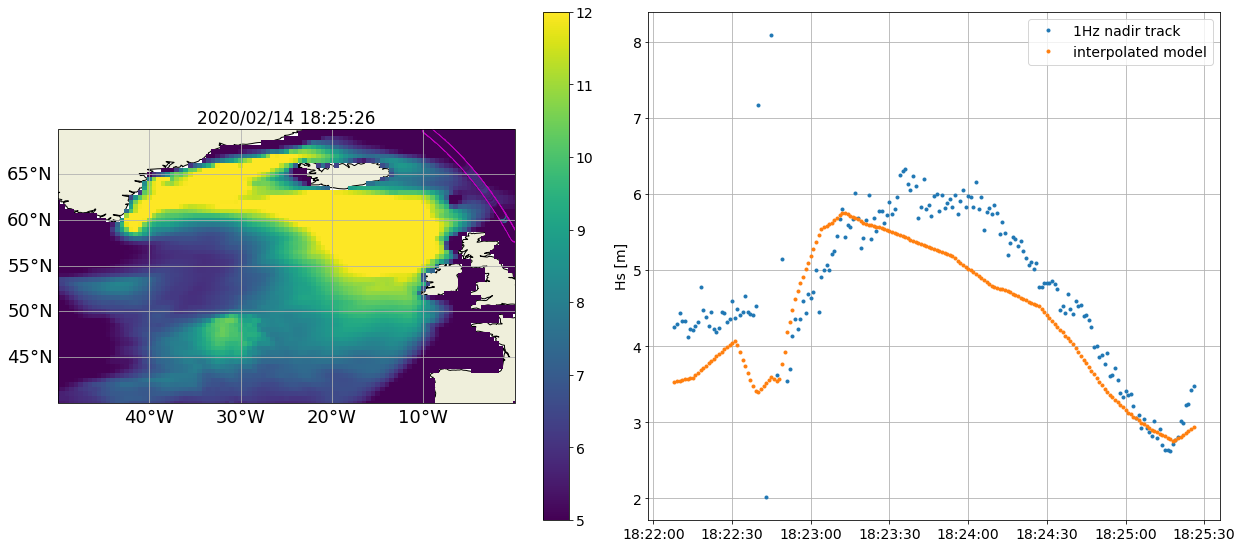

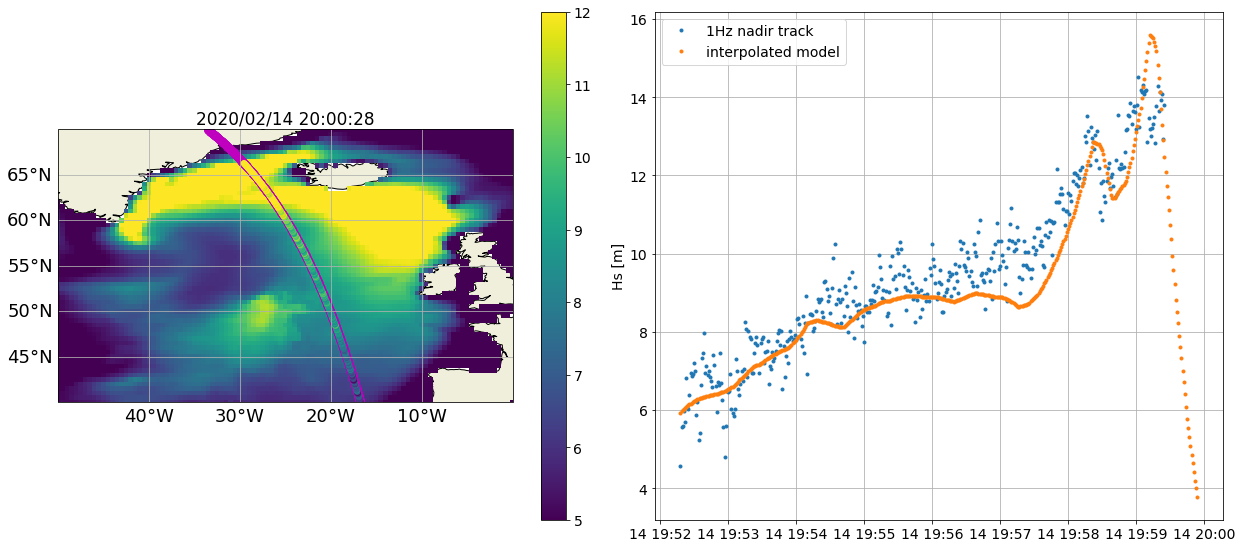

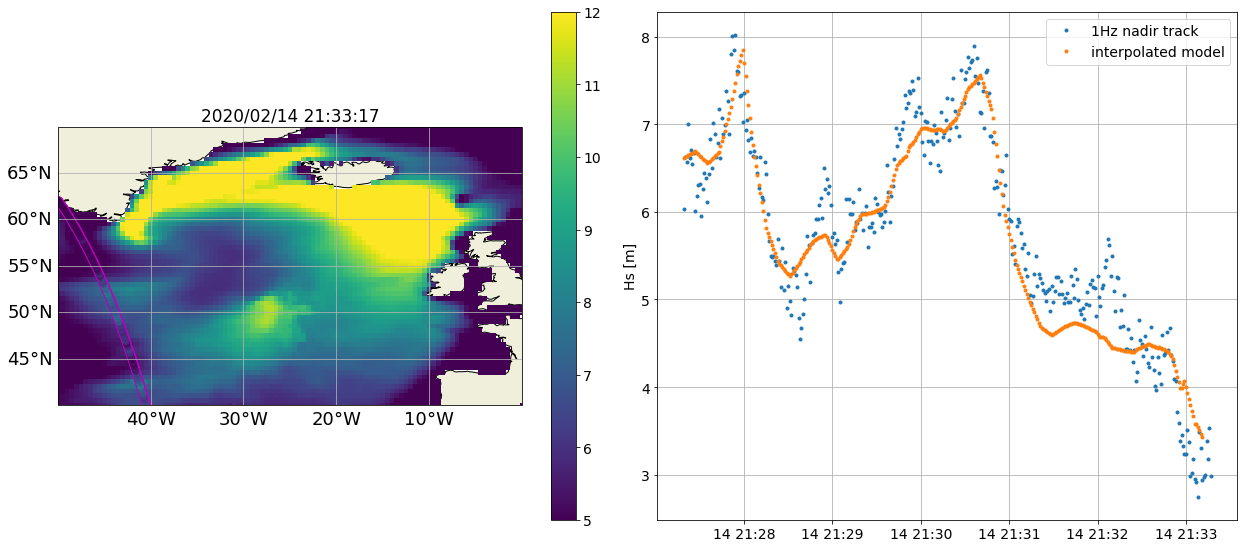

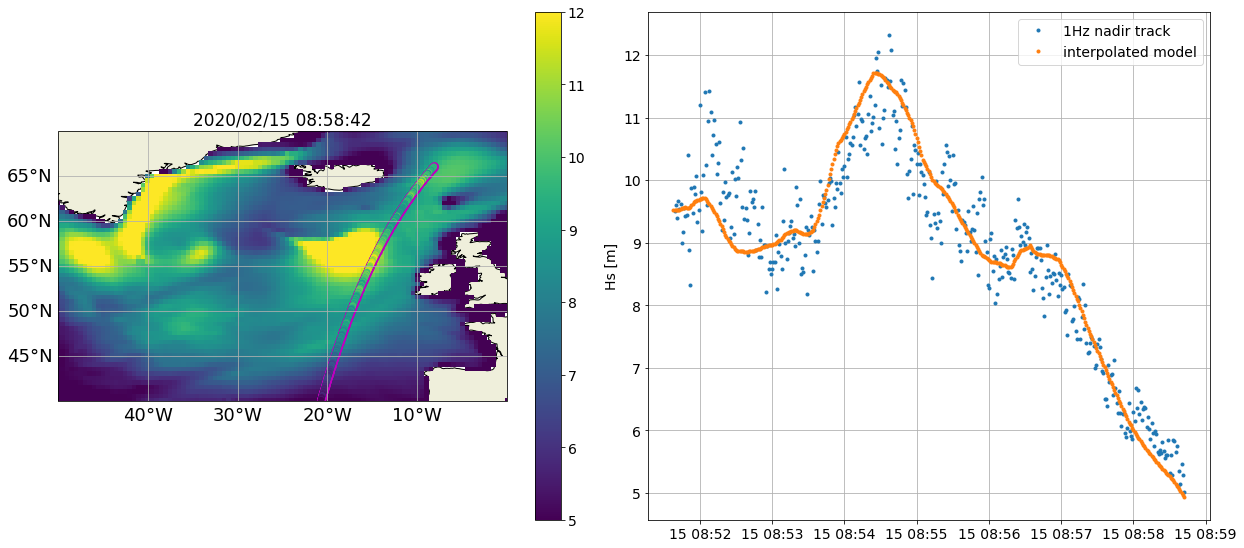

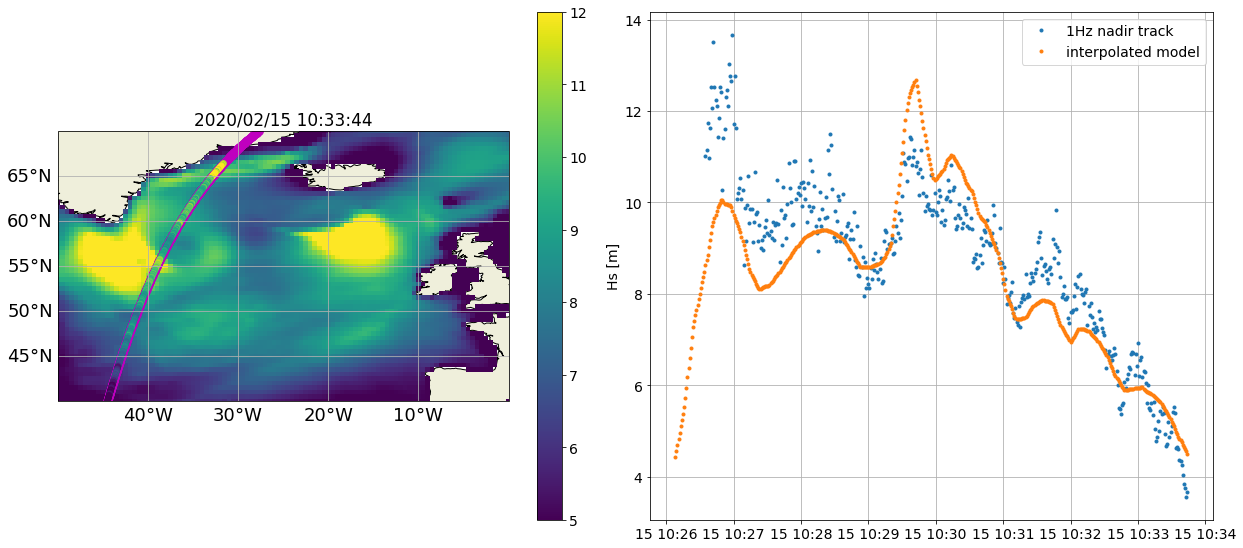

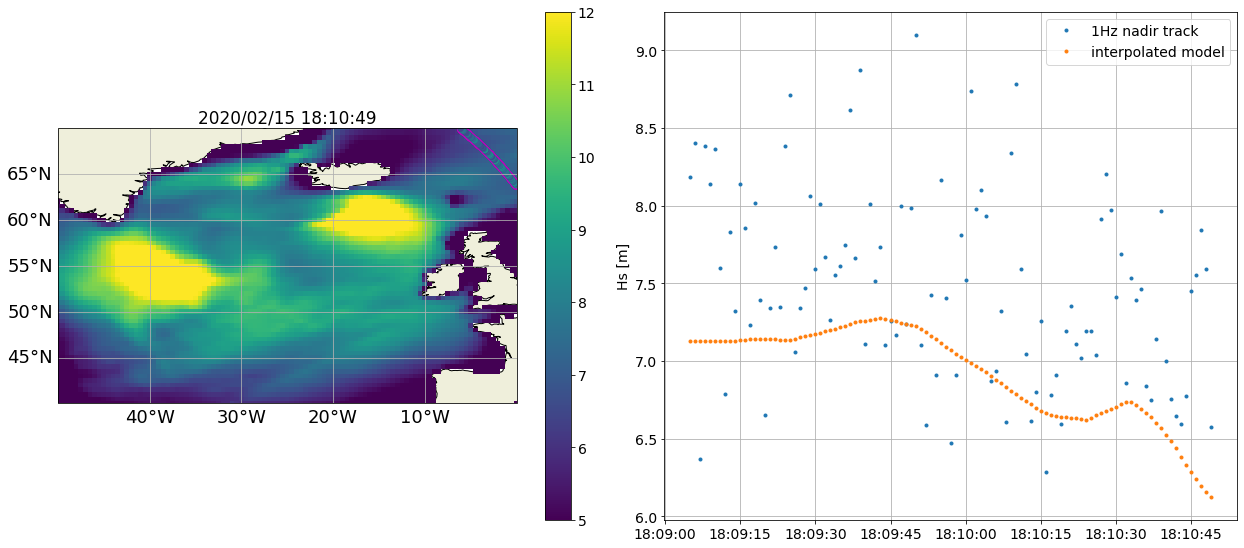

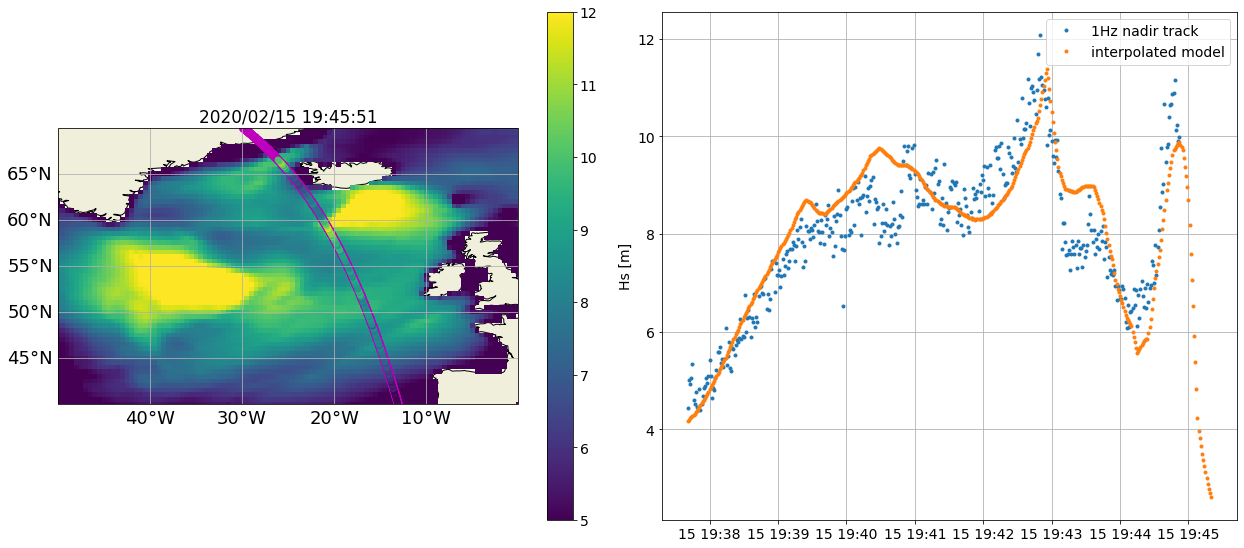

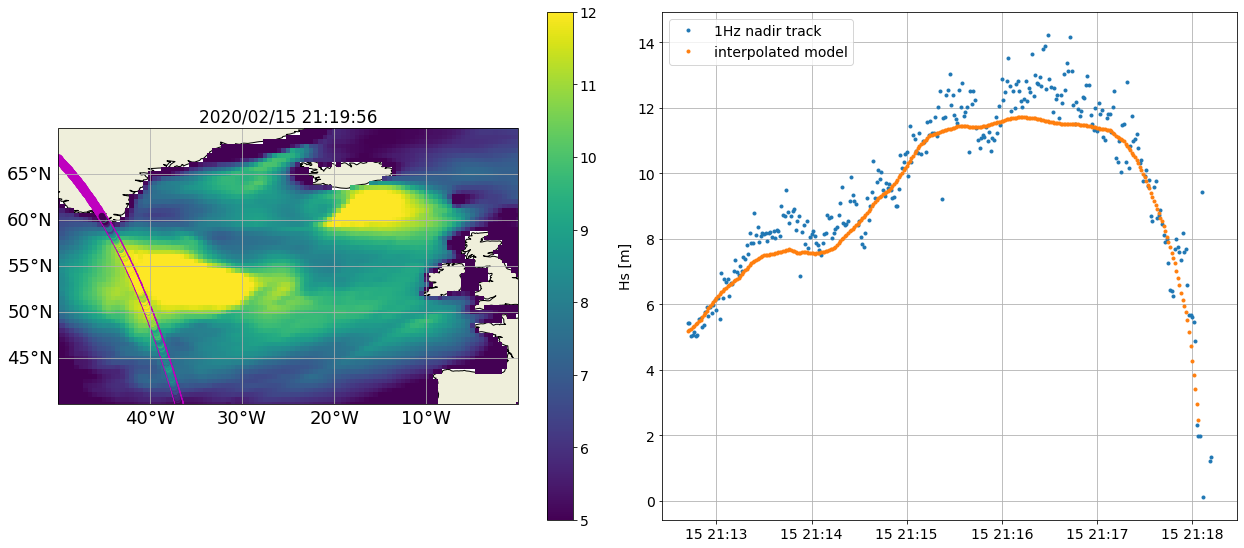

In [5]:
T1=pd.to_datetime('2020-02-13T12:00:00')
T2=pd.to_datetime('2020-02-16')
plot_Nadir_track_vs_model_frame(T1,T2,-50,0,40,70,NbHs_min=200)

In [12]:
wvl = 30
T=np.sqrt((2*np.pi)/9.81*wvl)
print(T)

4.383450007346958


ImportError: Dask diagnostics requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[diagnostics]" --upgrade  # or python -m pip install

<xarray.Dataset>
Dimensions:          (iswest: 2, time0: 1043, nparam: 3, n_beam_l2: 3, npartitions: 3, nk: 32, n_phi: 12, n_corners: 5)
Dimensions without coordinates: iswest, time0, nparam, n_beam_l2, npartitions, nk, n_phi, n_corners
Data variables: (12/13)
    lat              (iswest, time0) float32 dask.array<chunksize=(2, 522), meta=np.ndarray>
    lon              (iswest, time0) float32 dask.array<chunksize=(2, 522), meta=np.ndarray>
    wave_param       (nparam, iswest, time0, n_beam_l2) float32 dask.array<chunksize=(3, 2, 522, 3), meta=np.ndarray>
    wave_param_part  (nparam, npartitions, iswest, time0, n_beam_l2) float32 dask.array<chunksize=(3, 3, 2, 522, 3), meta=np.ndarray>
    pp_mean          (nk, n_phi, iswest, time0, n_beam_l2) float32 dask.array<chunksize=(32, 12, 2, 522, 3), meta=np.ndarray>
    k_spectra        (nk) float32 dask.array<chunksize=(32,), meta=np.ndarray>
    ...               ...
    swh_ecmwf        (iswest, time0) float32 dask.array<chunksize=(2, 

2020-02-13 12:00:00


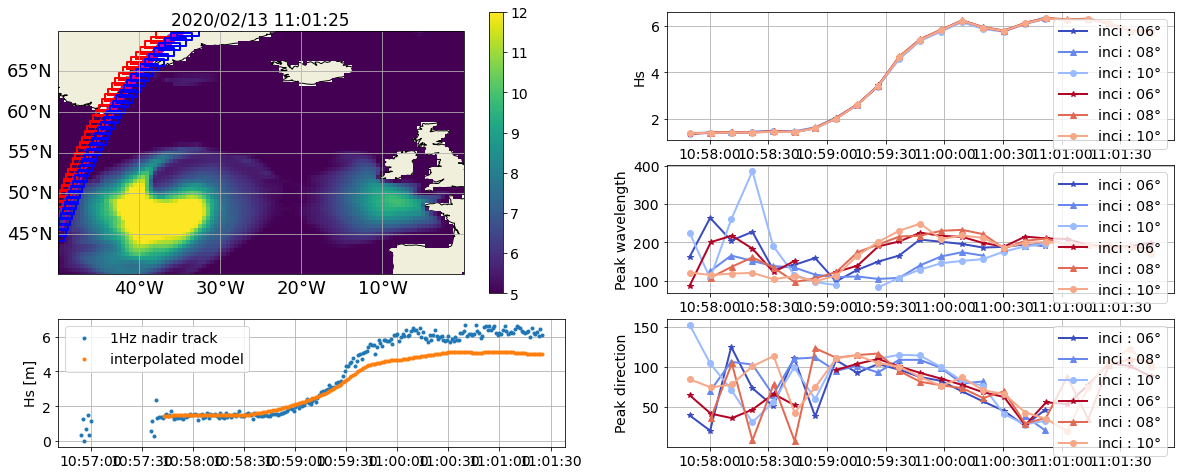

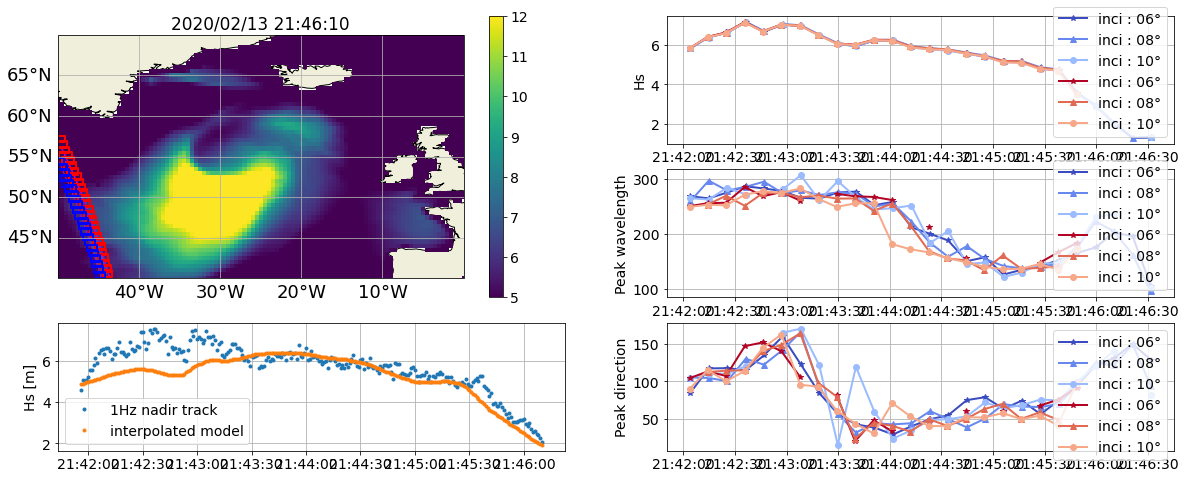

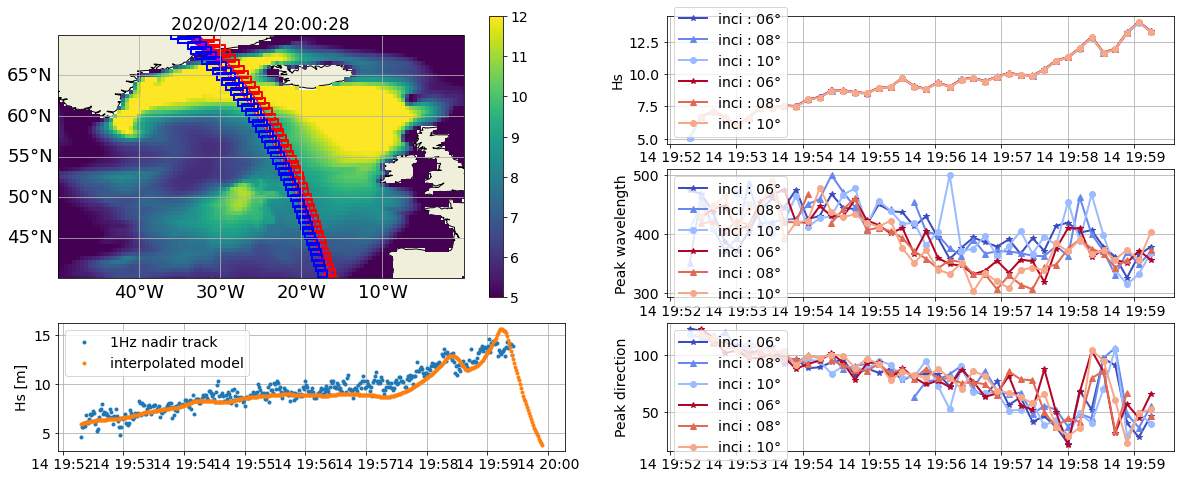

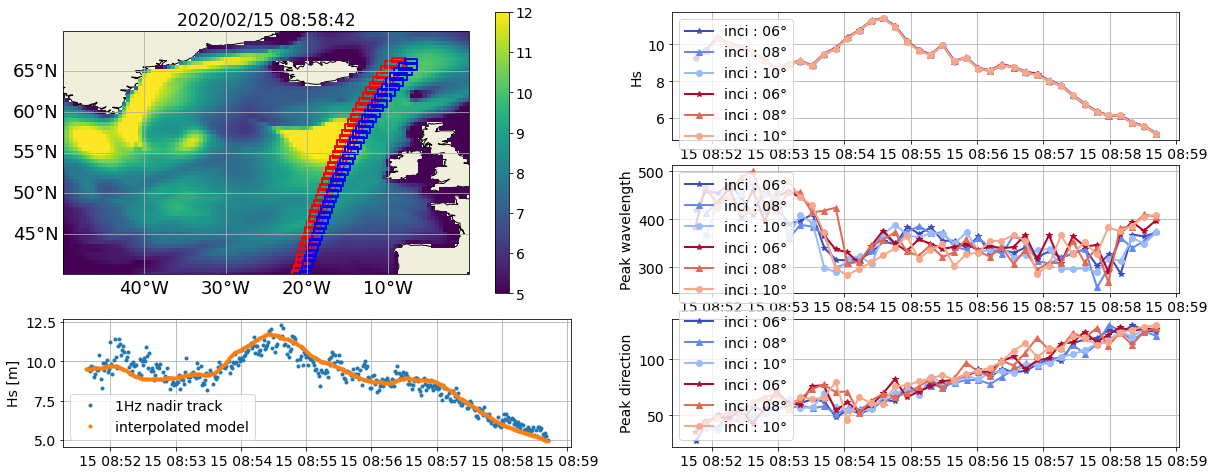

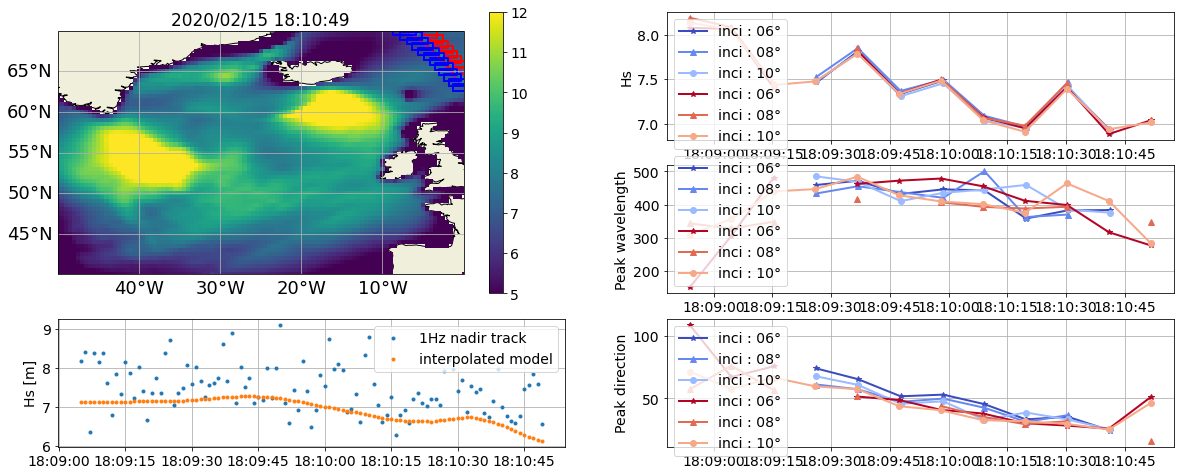

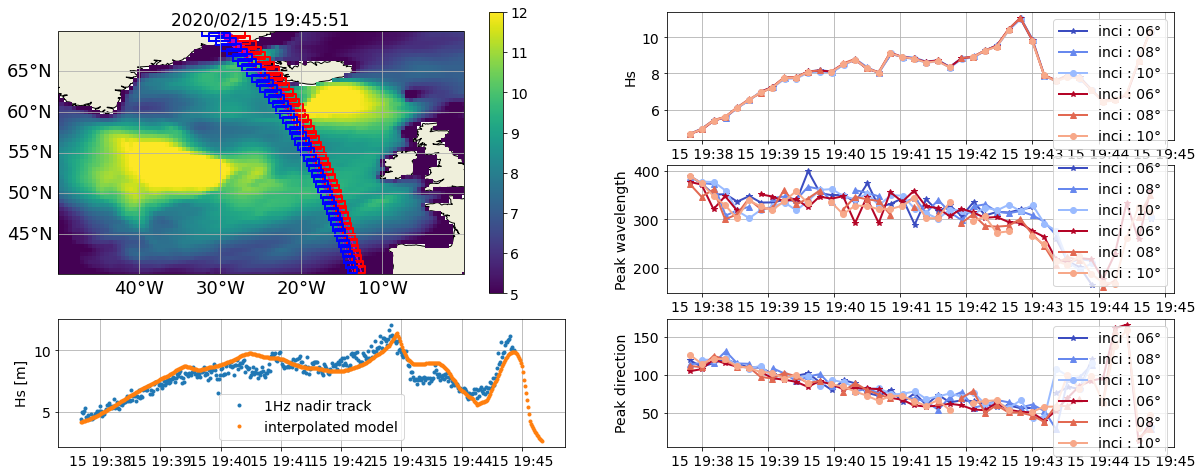

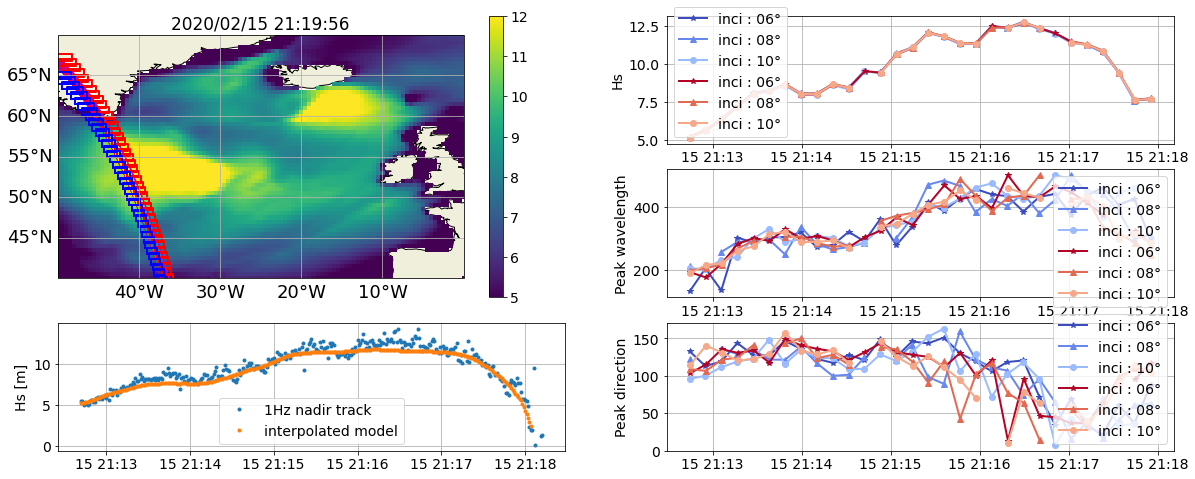

In [5]:
T1=pd.to_datetime('2020-02-13T12:00:00')
T2=pd.to_datetime('2020-02-16')
plot_Nadir_track_vs_model_frame_boxes(T1,T2,-50,0,40,70,NbHs_min=200)

FUNCTION apply_box_selection_to_ds(ds,lon_min,lon_max,lat_min,lat_max,flag_coords)
     applies to a dataset for a selected incidence angle (i.e. dims = (time0, k)
     returns a dataset corresponding to the region
     flag_coords = {0,1,2}
                   * 0 = based on lon,lat at middle of ribbon
                   * 1 = any lon,lat of a ribbon is inside the box
                   * 2 = all lon,lat of a ribbon are inside the box


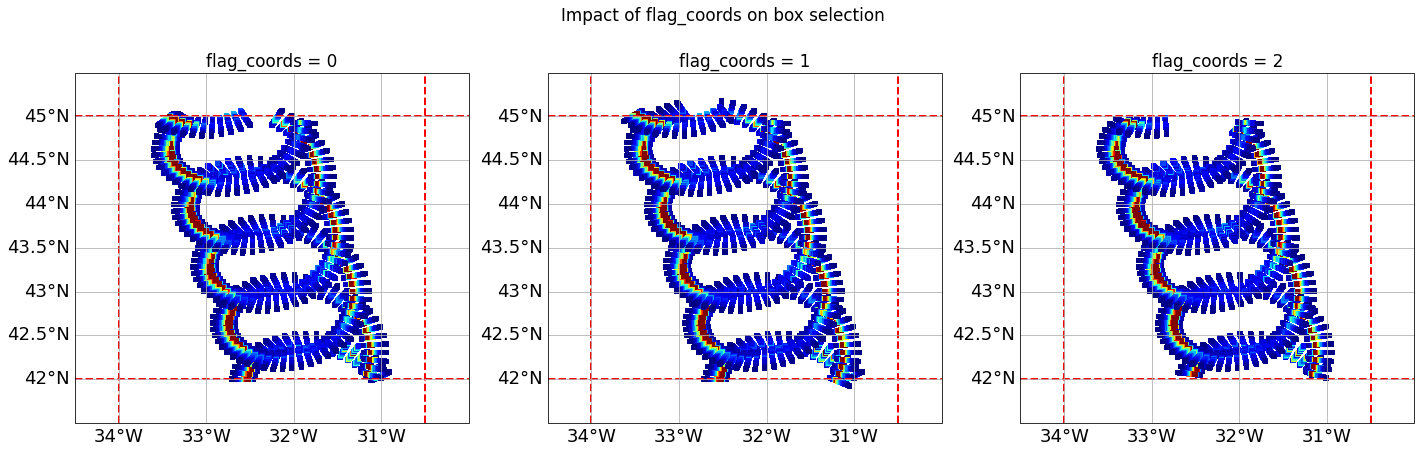

In [13]:
plot_info_apply_box_selection_to_ds(ds_l2s)

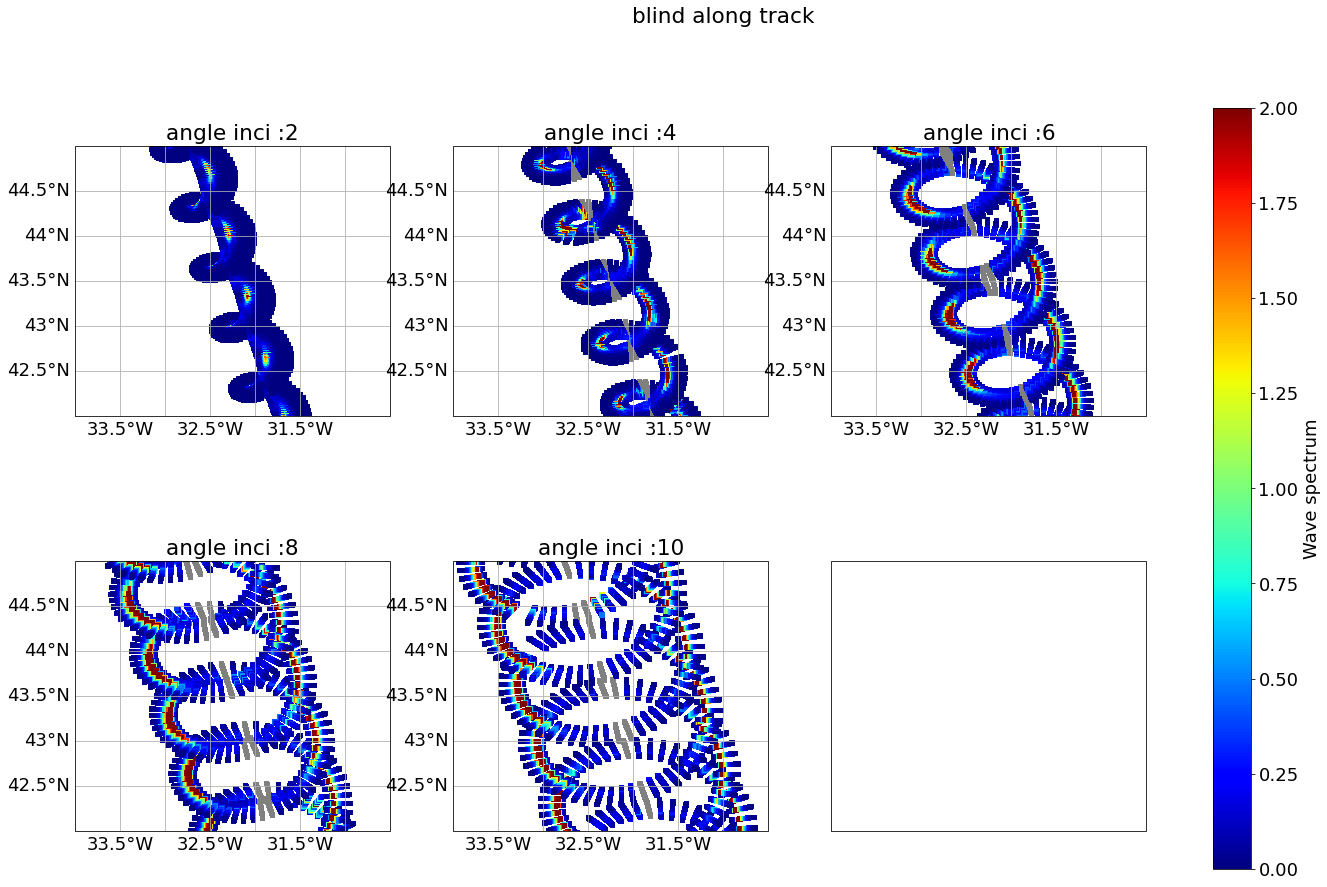

In [14]:
plot_ribbons_all_inci_in_box(ds_l2s)

FUNCTION get_macrocycles(ds)
     applies to a dataset for a selected incidence angle (i.e. dims = (time0, k)
     returns a dataset with a new variable "macrocycle_label" containing the number of the macrocycle


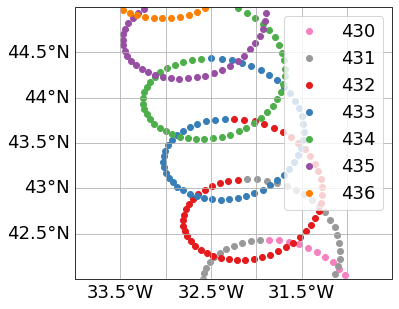

In [15]:
plot_info_get_macrocycles(ds_l2s)

In [16]:
plot_macrocycles_nadir(ds_l2s,ds_nadir_1Hz)

FUNCTION draw_spectrum_macrocyle_North(ax,ds,args*)
     this function draws the spectrum for a given macrocycle or half macrocycle
     with two half spectrum contours defined by the wavelength filter (wvlmin,wvlmax)
     and by the safety angle along cfosat track (dphi)
     inputs are:
	- the axes for the plot to be on
	- 'ds'		: the dataset with only one incidence angle + only one macrocycle
	- 'wvlmin'	: the minimum wavelength to be acounted for (default = min of wavelength vector)
	- 'wvlmax'	: the maximum wavelength to be accounted for (default = max of wavelength vector)
	- 'dphi	: the safety angle along cfosat track (default=0)
	- 'raxis'	: flag to decide if radial axis is freq (=0, default) or wavelength (=1)
	- 'isNorthward' : flag to decide if the 'north' of the spectrum corresponds to the geographic North (=1, default) of to the track (=0)
	- 'isNE'	: flag to print only the 4 cardinal points (=0) or to also add the NE, NW, SE and SW (=1, default)
	- 'cNorm'	: the normaliza

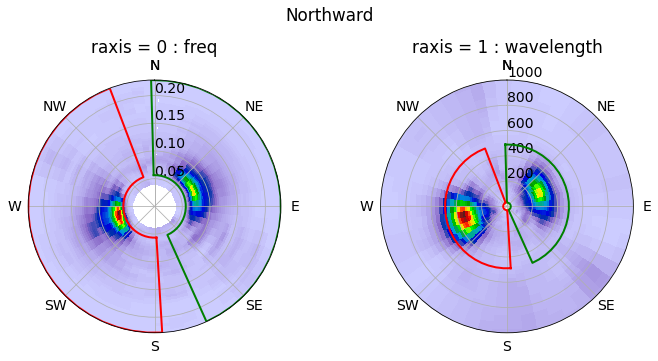

In [17]:
plot_info_draw_macrocycles(ds_l2s)

In [5]:
fig2=plot_tracks_all_inci_CNES_box(ds_l2s,ds_nadir_1Hz,ds_boxes,lon_min,lon_max,lat_min,lat_max)
fig2.savefig('pattern_of_all_inci_and_boxes_CNES.png')

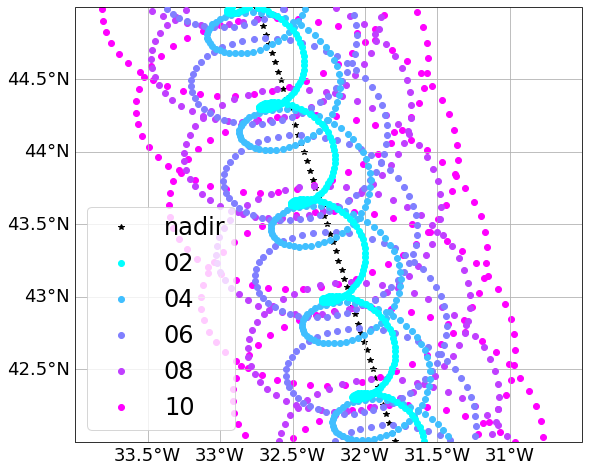

In [5]:
fig2=plot_tracks_all_inci(ds_l2s,ds_nadir_1Hz,lon_min,lon_max,lat_min,lat_max)
fig2.savefig('pattern_of_all_inci.png')

In [ ]:
# /!\ WARNING takes quite long time
plot_WW3_mesh_resolution(ds_l2s,ds_nadir_1Hz)

k =  0 i.e. 0b0  -----  k^6 =  6  i.e.  0b110
k =  1 i.e. 0b1  -----  k^6 =  7  i.e.  0b111
k =  2 i.e. 0b10  -----  k^6 =  4  i.e.  0b100
k =  3 i.e. 0b11  -----  k^6 =  5  i.e.  0b101
k =  4 i.e. 0b100  -----  k^6 =  2  i.e.  0b10
k =  5 i.e. 0b101  -----  k^6 =  3  i.e.  0b11
k =  6 i.e. 0b110  -----  k^6 =  0  i.e.  0b0
k =  7 i.e. 0b111  -----  k^6 =  1  i.e.  0b1
k =  8 i.e. 0b1000  -----  k^6 =  14  i.e.  0b1110
k =  9 i.e. 0b1001  -----  k^6 =  15  i.e.  0b1111
k =  10 i.e. 0b1010  -----  k^6 =  12  i.e.  0b1100
k =  11 i.e. 0b1011  -----  k^6 =  13  i.e.  0b1101
k =  12 i.e. 0b1100  -----  k^6 =  10  i.e.  0b1010
k =  13 i.e. 0b1101  -----  k^6 =  11  i.e.  0b1011
k =  14 i.e. 0b1110  -----  k^6 =  8  i.e.  0b1000
k =  15 i.e. 0b1111  -----  k^6 =  9  i.e.  0b1001
k =  16 i.e. 0b10000  -----  k^6 =  22  i.e.  0b10110
k =  17 i.e. 0b10001  -----  k^6 =  23  i.e.  0b10111
k =  18 i.e. 0b10010  -----  k^6 =  20  i.e.  0b10100
k =  19 i.e. 0b10011  -----  k^6 =  21  i.e.  0b10101


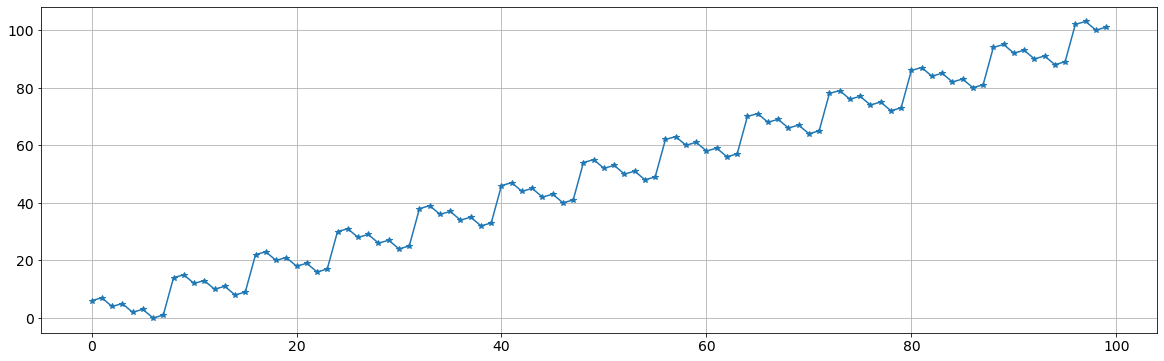

In [84]:
## ----- usage of ^ !!!!
ks = np.arange(100)
ks6 = ks^6
plt.figure(figsize=(20,6))
plt.plot(ks,ks6,'-*')
plt.grid(True)

for k in range(100):
    print('k = ',k, 'i.e.',bin(k),' -----  k^6 = ',k^6,' i.e. ',bin(k^6))
